<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/midterm_fixed_randomforest_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_sarima.csv")

In [3]:
# We can take a look at the first couple of samples
df.head()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y,dd_day_cos__elas,dd_month_cos__elas,...,dd_week_cos,dd_day_sin,dd_month_sin,dd_weekday_sin,dd_week_sin,dd_day,dd_month,dd_year,dd_weekday,dd_week
0,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1.042232,1.333333,...,0.482792,0.201299,-0.5,-4.338837e-01,-0.875735,1,11,2017,4,44
1,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1636688137,1.184156,1.333333,...,0.482792,0.394356,-0.5,-9.749279e-01,-0.875735,2,11,2017,5,44
2,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1659460906,1.484445,1.333333,...,0.482792,0.571268,-0.5,-7.818315e-01,-0.875735,3,11,2017,6,44
3,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1372713121,2.106703,1.333333,...,0.482792,0.724793,-0.5,-2.449213e-16,-0.875735,4,11,2017,7,44
4,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1571127834,3.573944,1.333333,...,0.582979,0.848644,-0.5,7.818315e-01,-0.812487,5,11,2017,1,45


In [4]:
# We can also get a statistical description of the data
df.describe()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y,dd_day_cos__elas,dd_month_cos__elas,...,dd_week_cos,dd_day_sin,dd_month_sin,dd_weekday_sin,dd_week_sin,dd_day,dd_month,dd_year,dd_weekday,dd_week
count,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1833.000000,1.833000e+03,...,1833.000000,1.833000e+03,1.833000e+03,1.833000e+03,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.732102e+09,31.471001,2.497989e+31,...,-0.013813,3.955535e-03,-6.794590e-03,-2.367069e-04,-0.003241,15.683033,6.540644,2019.841244,4.000546,26.655210
std,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.463154e+08,95.463045,7.393780e+31,...,0.700944,7.135506e-01,7.052383e-01,7.074200e-01,0.713458,8.815517,3.453941,1.465916,2.000955,15.075793
min,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,1.000000,1.000000e+00,...,-0.998244,-9.987165e-01,-1.000000e+00,-9.749279e-01,-0.999561,1.000000,1.000000,2017.000000,1.000000,1.000000
25%,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,1.184156,1.333333e+00,...,-0.717507,-7.247928e-01,-8.660254e-01,-7.818315e-01,-0.737833,8.000000,4.000000,2019.000000,2.000000,14.000000
50%,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,2.106703,1.333333e+00,...,0.029633,-2.449213e-16,-2.449213e-16,-2.449213e-16,-0.059241,16.000000,7.000000,2020.000000,4.000000,27.000000
75%,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.281038e+09,8.290435,4.000000e+00,...,0.674983,7.247928e-01,5.000000e-01,7.818315e-01,0.696551,23.000000,10.000000,2021.000000,6.000000,40.000000
max,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,389.812134,2.667270e+32,...,1.000000,9.987165e-01,1.000000e+00,9.749279e-01,0.999561,31.000000,12.000000,2022.000000,7.000000,53.000000


In [5]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [6]:
y = df['y']
X = df.drop('y',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50/1833, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=50/1833, shuffle=True)

In [8]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(n_estimators=20, random_state=0)
scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles = 100)

pipe = Pipeline(
    [
      ('scaler', scaler),
      ('qt', qt),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train,y_train).predict(X_test)
pred_s = pipe.fit(X_train_s,y_train_s).predict(X_test_s)

pred[0:4] |_| print
pred_s[0:4] |_| print

1953694445.2
1950795082.35
2183705165.75
2219720572.05
3763677706.6
2736708328.25
1416286043.3
2608845062.8


array([None, None, None, None], dtype=object)

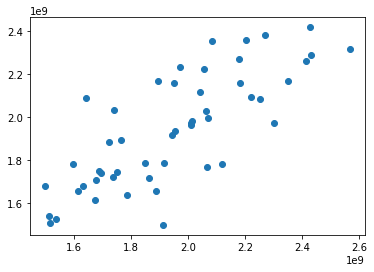

In [9]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test);

In [10]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 135731678.648
Mean Squared Error: 3.0774079069230732e+16
Root Mean Squared Error: 175425423.09833753
R squared: 0.5383428908192136


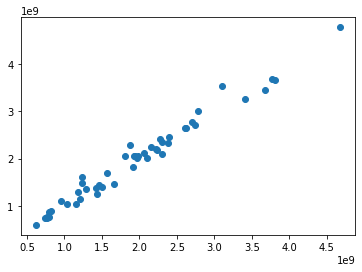

In [11]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s);

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_s, pred_s))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_s, pred_s))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_s, pred_s)))
print('R squared:', metrics.r2_score(y_test_s, pred_s))

Mean Absolute Error: 107035397.69300003
Mean Squared Error: 2.128198041971953e+16
Root Mean Squared Error: 145883448.0663229
R squared: 0.9745927034062224
